__Forward encoding model based on Pim Mostert Decoding toolbox__

In [1]:
!pwd

/Users/junjieji/Desktop/master-thesis


In [2]:
'''USE THIS ONE FOR PRINTING VALUES ONLY'''

'USE THIS ONE FOR PRINTING VALUES ONLY'

# Init

In [3]:
# %matplotlib qt
from scipy.io import loadmat
import numpy as np
import pandas as pd
import mat73
import mne
import os

import inspect #path_fun = inspect.getfile(StratifiedKFold)
import matplotlib.pyplot as plt
import DecToolbox as dt
#print(sys.path)

import sys
path_utils = '/decoding_toolbox_py/helper_funcs' 
sys.path.append(path_utils)
# !pip install mat73

Decoding modules

In [4]:
''' VARIABLES '''
# Kappa value for the train_encoder function
kappa = 4

# No time dimension (We only select one point as example)
sel_t = 120

# For plotting
x_labels = np.array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5])


In [5]:
path = '/decoding-toolbox_matlab/data/'
path_ori_data = path + 'testdata_orientation.mat'

print(path_ori_data)

path = 'decoding-toolbox_matlab/data/testdata_orientation.mat' 

/decoding-toolbox_matlab/data/testdata_orientation.mat


Loading & preparing orientation data

In [6]:
ori_data = mat73.loadmat(path)

KeyboardInterrupt: 

In [ ]:
EGG = True

subjs_list = ['s01', 's02'
              #, 's03' ,'s04','s05','s07','s08','s09','s10','s11','s12','s13','s14', 's15', 's16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27' 
                ]
if EGG:
    
    path = 'Cond_CJ_EEG'

    epochs = []
    for isubj, subject_id in enumerate(subjs_list):
        preproc_path = os.path.join(path, subject_id);
        epoch = mne.read_epochs(preproc_path + '/main_epo.fif',verbose=False)
        epochs.append(epoch.average());
        # print(isubj)

    gvaverage = mne.grand_average(epochs[:])
    all_epochs = []
    all_rawdata = [None] * np.size(subjs_list)
    for isubj, subject_id in enumerate(subjs_list):
        preproc_path = os.path.join(path, subject_id);
        epoch = mne.read_epochs(preproc_path + '/main_epo.fif',verbose=False)
        subj_data = {'epoch_dat' : epoch.get_data(), 'metadata' :  epoch.metadata}
        all_rawdata[isubj] =  subj_data
        all_epochs.append(epoch);
        epoch.metadata
    all_st_epochs = []
    all_st_rawdata = [None] * np.size(subjs_list)
    for isubj, subject_id in enumerate(subjs_list):
        preproc_path = os.path.join(path, subject_id);
        epoch = mne.read_epochs(preproc_path + '/mainstim_epo.fif',verbose=False)
        subj_data = {'epoch_dat' : epoch.get_data(), 'metadata' :  epoch.metadata}
        all_st_rawdata[isubj] =  subj_data
        all_st_epochs.append(epoch);
        epoch.metadata



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Identifying common channels ...


In [ ]:
ival = 0
Y = ori_data['Y']
X = ori_data['X']
time = ori_data['time']
label = ori_data['label'] # Label of the features
print('Y', Y.shape,'X', X.shape,'time', time.shape)

tt = all_st_epochs[ival].times
ll= all_st_epochs[ival].ch_names
YY = all_st_rawdata[ival]['epoch_dat']
YY = np.einsum('kji->jik', YY)
XX = np.array(all_st_rawdata[ival]['metadata'].orient)
print('YY', YY.shape,'XX', XX.shape,'tt', tt.shape)

binned_XX = np.digitize(XX, bins = np.array([  0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5 ]) ) # bins collapsing degrees by similarity 



Y (273, 211, 760) X (760,) time (211,)
YY (32, 201, 1563) XX (1563,) tt (201,)


In [ ]:
''' If False it's gonna use the matlab data instead of the EGG
'''

useEGG = False
if useEGG:
    X, Y, time, label = binned_XX, YY, tt, ll

print('Y', Y.shape,'X', X.shape,'time', time.shape)


Y (273, 211, 760) X (760,) time (211,)


In [ ]:
print(min(Y[0,0,:]), max(Y[0,0,:]))
print(min(YY[0,0,:]), max(YY[0,0,:]))

-1.9445696534125855e-13 2.3511431276385023e-13
-1.2258062088982193e-05 1.679904987689554e-05


In [ ]:
# print(min(X), max(X))
# print(min(XX), max(XX))


In [ ]:
print(Y[0,0,:].shape)
print(X.shape)

(760,)
(760,)


In [ ]:
print(Y[0,1,0])

-8.006150406272557e-14


In [ ]:
print(time.shape)
print(tt.shape)

(211,)
(201,)


In [ ]:
print(Y.shape)

(273, 211, 760)


In [ ]:
print(YY.shape)

(32, 201, 1563)


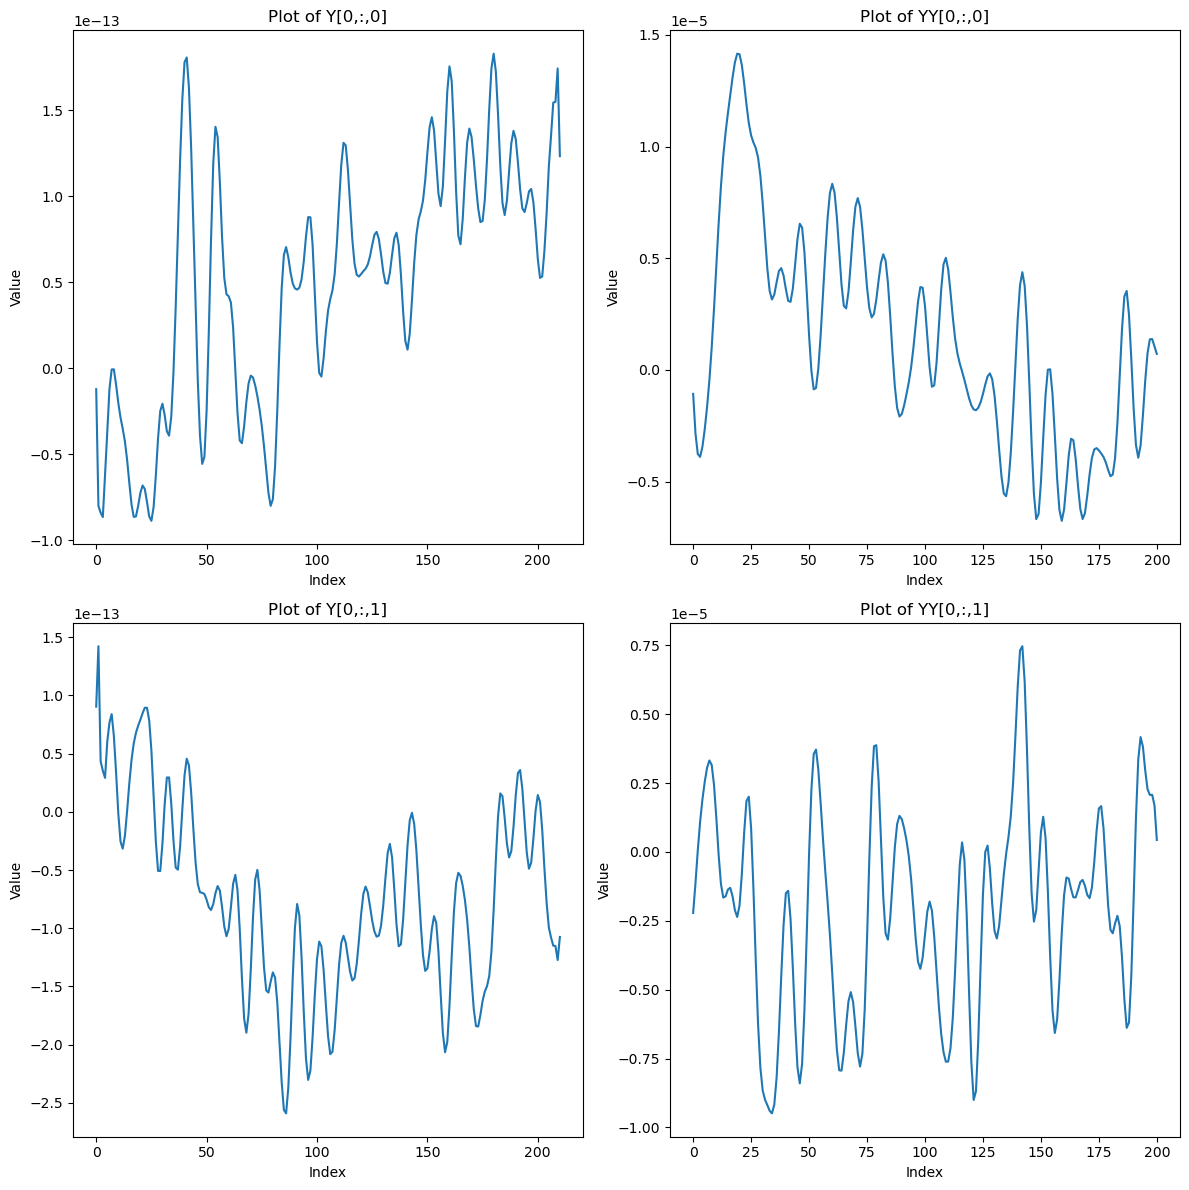

In [ ]:
# Create subplots side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

data = 3

# Plot Y[0,:,0] in the first subplot
axs[0, 0].plot(Y[0,:,0])
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Plot of Y[0,:,0]')

# Plot YY[0,:,0] in the second subplot
axs[0, 1].plot(YY[0,:,0])
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Value')
axs[0, 1].set_title('Plot of YY[0,:,0]')

# Plot Y[0,:,1] in the third subplot
axs[1, 0].plot(Y[0,:,data])
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Value')
axs[1, 0].set_title('Plot of Y[0,:,1]')

# Plot YY[0,:,1] in the fourth subplot
axs[1, 1].plot(YY[0,:,data])
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('Value')
axs[1, 1].set_title('Plot of YY[0,:,1]')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



In [ ]:
print(np.shape(label))
print(label)

(273, 1)
[['MLC12'], ['MLC13'], ['MLC14'], ['MLC15'], ['MLC16'], ['MLC17'], ['MLC21'], ['MLC22'], ['MLC23'], ['MLC24'], ['MLC25'], ['MLC31'], ['MLC32'], ['MLC41'], ['MLC42'], ['MLC51'], ['MLC52'], ['MLC53'], ['MLC54'], ['MLC55'], ['MLC61'], ['MLC62'], ['MLC63'], ['MLF11'], ['MLF12'], ['MLF13'], ['MLF14'], ['MLF21'], ['MLF22'], ['MLF23'], ['MLF24'], ['MLF25'], ['MLF31'], ['MLF32'], ['MLF33'], ['MLF34'], ['MLF35'], ['MLF41'], ['MLF42'], ['MLF43'], ['MLF44'], ['MLF45'], ['MLF46'], ['MLF51'], ['MLF52'], ['MLF53'], ['MLF54'], ['MLF55'], ['MLF56'], ['MLF61'], ['MLF62'], ['MLF63'], ['MLF64'], ['MLF65'], ['MLF66'], ['MLF67'], ['MLO11'], ['MLO12'], ['MLO13'], ['MLO14'], ['MLO21'], ['MLO22'], ['MLO23'], ['MLO24'], ['MLO31'], ['MLO32'], ['MLO33'], ['MLO34'], ['MLO41'], ['MLO42'], ['MLO43'], ['MLO44'], ['MLO51'], ['MLO52'], ['MLO53'], ['MLP11'], ['MLP12'], ['MLP21'], ['MLP22'], ['MLP23'], ['MLP31'], ['MLP32'], ['MLP33'], ['MLP34'], ['MLP35'], ['MLP41'], ['MLP42'], ['MLP43'], ['MLP44'], ['MLP45'], 

In [ ]:
phi = X * (180/8);   # Presented orientation in degrees
print(phi)
binned_phi = np.digitize(phi, bins = np.array([  0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5 ]) ) # bins collapsing degrees by similarity
print(binned_phi)
numF = Y.shape[0];
numT = Y.shape[1];
numN = Y.shape[2];
numC = 8 # how many channels to use

[157.5   0.  135.  157.5   0.   90.   22.5   0.   22.5  67.5  67.5  67.5
  67.5 112.5 135.    0.   45.   67.5 112.5  22.5 157.5  45.  112.5  22.5
   0.  157.5  90.  112.5   0.   67.5  67.5 135.  112.5  45.  135.  135.
 135.    0.  112.5  90.   90.   22.5 157.5  90.   67.5 157.5  90.    0.
 135.   22.5  22.5  90.   45.   90.   90.  112.5   0.   67.5 112.5 135.
 112.5  67.5  90.   45.  157.5  45.  157.5  45.   45.  135.  135.   45.
  22.5 135.    0.   45.   22.5 157.5  22.5   0.  135.  157.5   0.  157.5
 157.5 112.5  22.5  45.  112.5  90.   90.   22.5  67.5  45.  135.  112.5
  22.5  90.  157.5  90.  157.5   0.  112.5  22.5  90.   45.  112.5   0.
 135.   45.    0.    0.    0.  157.5 135.  112.5 112.5  45.   67.5 112.5
  45.   45.    0.  112.5  45.   67.5  22.5  67.5  22.5 135.   90.   90.
   0.   67.5  45.   45.  135.   67.5  45.  157.5 157.5   0.  112.5  90.
 135.   22.5  90.  157.5 135.  157.5   0.    0.  157.5  67.5  45.  157.5
 112.5  45.   67.5 157.5  45.   22.5 112.5   0.   22.5 112

Creating and saving dat

In [ ]:
G = binned_phi.copy() # binning/discritizing orientation dimension to assign a balanced number of stimuli to different dat
# binned_phi = (G-1)*(180/4)
# G = (G-1)*(180/4)
print(G.shape)
CONDS = np.unique(G);
nConds = CONDS.size
print(CONDS)
nfold = 2
# FoldsIdx = dt.CreateFolds(binned_phi, Y, nfold)
FoldsIdx = dt.CreateFolds(G, Y, nfold)

(760,)
[1 2 3 4 5 6 7 8]


In [ ]:

print(np.squeeze(Y[:,sel_t, FoldsIdx[0]['train_index']]).shape)

(273, 380)


In [ ]:
dat = dict()
dat['X_train'] = G[ FoldsIdx[0]['train_index']]
dat['Y_train'] = np.squeeze(Y[:,sel_t, FoldsIdx[0]['train_index']])
dat['phi_train'] = phi[ FoldsIdx[0]['train_index']]

dat['X_test'] = G[ FoldsIdx[0]['test_index']]
dat['Y_test'] = np.squeeze(Y[:,sel_t, FoldsIdx[0]['test_index']])
dat['phi_test'] = phi[ FoldsIdx[0]['test_index']]

(380,) ()
(8, 380) (8, 380)


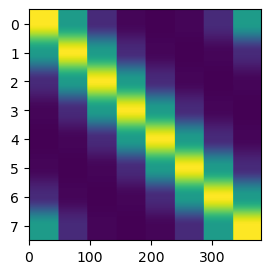

In [ ]:


cfg = dict()
cfg['kappa'] = 2
cfg['NumC'] = numC
cfg['Tuning'] = 'vonmises'#'halfRectCos'
cfg['offset'] = 0

print(np.shape(dat['phi_train']), np.shape(cfg))

design, sortedesign = dt.stim_features(dat['phi_train'], cfg)
# design, sortedesign = dt.stim_features(binned_phi, cfg)

print(np.shape(design), np.shape(sortedesign))

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(sortedesign,aspect='auto'
           
           # ,interpolation = 'none'
           )

# Part 1

## for comparing this script and the matlab one
import scipy
path_folds_data = '/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/Projects/Condcision/Group_level_analyses/Beh_analyses/EEG_condcision_CJ/folds.mat'

mat = scipy.io.loadmat(path_folds_data)

idx_Train = mat['folds'][0][0].T
idx_Test =mat['folds'][1][0][0].T

#Folds_ori = Folds.copy()
dat = {}
dat['X_train'] = G[idx_Train-1] # -1 to correct for matlab to python indexes
dat['X_test'] = G[idx_Test-1]
dat['Y_train'] = np.squeeze(Y[:,sel_t, idx_Train-1])
dat['Y_test'] = np.squeeze(Y[:,sel_t, idx_Test-1])
dat['phi_train'] = phi[idx_Train-1]
dat['phi_test'] = phi[idx_Test-1]

Create design matrix

numC = 8 # how many channels to use

cfg = dict()
cfg['kappa'] = 4
cfg['NumC'] = numC
cfg['Tuning'] = 'vonmises'#'halfRectCos'
cfg['offset'] = 0

design, sortedesign = dt.stim_features(dat['phi_train'], cfg)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(sortedesign,aspect='auto',interpolation = 'none')

Training encoding model

In [ ]:
cfg = dict()
cfg['gamma'] = 0.01
cfg['demean'] = True
cfg['returnPattern'] = True

print(np.shape(design), np.shape(dat['Y_train']), np.shape(cfg))

decoder = dt.train_encoder(design, dat['Y_train'], cfg)

print(np.shape(decoder))

(8, 380) (273, 380) ()
()


Testing the encoding model

In [ ]:
cfg = dict()
cfg['demean'] = 'traindata'

print(np.shape(decoder), np.shape(dat['Y_test']), np.shape(cfg))

Xhat = dt.test_encoder( decoder, dat['Y_test'], cfg)

print(np.shape(Xhat))

() (273, 380) ()
(8, 380)


__Preparing data for plotting results__

In [ ]:
m = np.zeros((numC,numC))
for ic in range(numC):
   m[:,ic] =  np.mean( Xhat[:, np.where(dat['X_test'] == (ic+1))[0]], axis = 1)


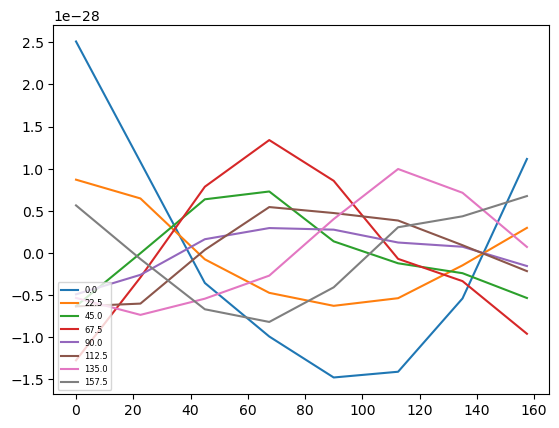

In [ ]:
plt.plot(x_labels, m)
plt.legend(x_labels, loc=3, prop={'size': 6})

Re-alligning predictions for trials with identical orientation

In [ ]:
Xhat_centered = 0*Xhat.copy()
for ic in range(numC): # here trials that match similar label orientation are shifted together x positions (np.roll)
    Xhat_centered[:,np.where(dat['X_test'] == (ic+1))] = np.roll(Xhat[:,np.where(dat['X_test'] == (ic+1))], -ic, axis = 0)

In [ ]:
m_centered = np.zeros((numC,numC))
for ic in range(numC):
   m_centered[:,ic] =  np.mean( Xhat_centered[:, np.where(dat['X_test'] == (ic+1))[0]], axis = 1)

In [ ]:
print(m_centered.shape)

(8, 8)


In [ ]:
Xhat_centeredmean = np.mean(Xhat_centered, axis = 1)
Xhat_centeredsem = np.std(m_centered, axis = 1)/Xhat.shape[1]
Xhat_shiftedmean = np.roll(Xhat_centeredmean, 3, axis = 0)
Xhat_shiftedsem = np.roll(Xhat_centeredsem, 3, axis = 0)
x_centeredlabels = np.roll(x_labels,  3, axis = 0)

In [ ]:
# Kernel to back project channel outputs to orientation space
kernel = np.exp(1j * (np.linspace(0, numC-1,numC)*(2*np.pi/numC)))
Z = kernel @ Xhat

theta = np.mod(np.angle(Z), 2*np.pi) * (180/np.pi) / 2    # Decoded orientation (retain the module of the complex number)

r = np.mean(np.exp(1j * (theta - dat['phi_test']) * (np.pi/180)*2)) # correlation between decoded and presented orientation
r = np.abs(r) * np.cos(np.angle(r))
r

0.29287139788663846

Getting mean orientation values for each stimulus bin

In [ ]:
mtheta = np.zeros(numC)
for ic in range(numC):
    mtheta[ic] = np.mod(np.angle(np.mean(np.exp(1j * theta[np.where(dat['X_test'] == (ic+1))[0]] * (np.pi/180)*2))), 2*np.pi) * (180/np.pi) / 2

# Plotting results

In [ ]:
print(m.shape)

(8, 8)


[Text(0.0, 0, '0.0'),
 Text(22.5, 0, '22.5'),
 Text(45.0, 0, '45.0'),
 Text(67.5, 0, '67.5'),
 Text(90.0, 0, '90.0'),
 Text(112.5, 0, '112.5'),
 Text(135.0, 0, '135.0'),
 Text(157.5, 0, '157.5')]

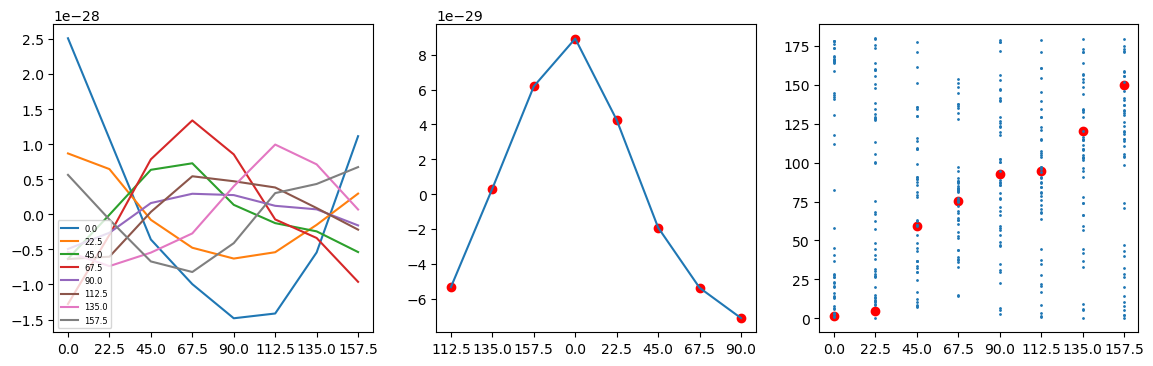

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
# ax[0].plot(x_labels, m_centered)
ax[0].plot(x_labels, m)

ax[0].set_xticks(x_labels)
ax[0].set_xticklabels(x_labels.astype(str))
ax[0].legend(x_labels, loc=3, prop={'size': 6})


ax[1].plot(x_labels, Xhat_shiftedmean)
ax[1].fill_between(x_labels, Xhat_shiftedmean-Xhat_shiftedsem, Xhat_shiftedmean+Xhat_shiftedsem)
ax[1].scatter(x_labels, Xhat_shiftedmean, color = 'red')
ax[1].set_xticks(x_labels)
ax[1].set_xticklabels(x_centeredlabels.astype(str))


ax[2].scatter(x_labels, mtheta, color = 'red')
ax[2].scatter(dat['phi_test'], theta, s = 1)
ax[2].set_xticks(x_labels)
ax[2].set_xticklabels(x_labels.astype(str))


np.mean(np.exp(1j * (theta - dat['phi_test']) * (np.pi/180)*2))

In [ ]:
# print(cval)

__Preparing crossvalidation procedure__

In [ ]:
import DecToolbox as dt
from importlib import reload  # Python 3.4+
reload(dt)

<module 'DecToolbox' from '/Users/junjieji/Desktop/master-thesis/DecToolbox.py'>

In [ ]:
G = binned_phi.copy() # binning/discritizing orientation dimension to assign a balanced number of stimuli to different dat
CONDS = np.unique(G)
nConds = CONDS.size
nfold = 4
FoldsIdx = dt.CreateFolds(G, Y, nfold)

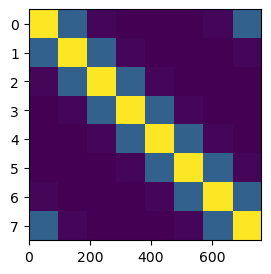

In [ ]:
numC = 8 # how many channels to use

cfg = dict()
cfg['kappa'] = kappa
cfg['NumC'] = numC
cfg['Tuning'] = 'vonmises'#'halfRectCos'
cfg['offset'] = 0

design, sortedesign = dt.stim_features(phi, cfg)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(sortedesign,aspect='auto',interpolation = 'none')

In [ ]:
from DecToolbox import CV_encoder
cfg = dict()
cfg['cfgE'] = {'gamma': 0.01, 'demean' : True, 'returnPattern' : True}
cfg['cfgD'] = {'demean' : 'traindata'}
Xhat = CV_encoder(design, Y, sel_t, cfg, FoldsIdx)

In [ ]:
print(Xhat.shape)

(8, 760, 211)


In [ ]:
m = np.zeros((numC,numC))
for ic in range(numC):
   m[:,ic] =  np.mean( Xhat[:, G == (ic+1)], axis = 1)

Re-alligning predictions for trials with identical orientation

In [ ]:
Xhat_centered = 0*Xhat.copy()
m_centered = np.zeros((numC,numC))
for ic in range(numC): # here trials that match similar label orientation are shifted together x positions (np.roll)
    Xhat_centered[:, G == (ic+1)] = np.roll(Xhat[:,G == (ic+1)], -ic, axis = 0)
    m_centered[:,ic] =  np.mean( Xhat_centered[:,  G == (ic+1)], axis = 1)

In [ ]:
x_labels = np.array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5])
Xhat_centeredmean = np.mean(Xhat_centered, axis = 1)
Xhat_centeredsem = np.std(m_centered, axis = 1)/Xhat.shape[1]
Xhat_shiftedmean = np.roll(Xhat_centeredmean, 3, axis = 0)
Xhat_shiftedsem = np.roll(Xhat_centeredsem, 3, axis = 0)
x_centeredlabels = np.roll(x_labels,  3, axis = 0)

In [ ]:
# Kernel to back project channel outputs to orientation space
kernel = np.exp(1j * (np.linspace(0, numC-1,numC)*(2*np.pi/numC)))
Z = kernel @ Xhat

theta = np.mod(np.angle(Z), 2*np.pi) * (180/np.pi) / 2    # Decoded orientation (retain the module of the complex number)

r = np.mean(np.exp(1j * (theta - phi) * (np.pi/180)*2)) # correlation between decoded and presented orientation
r = np.abs(r) * np.cos(np.angle(r))
r

0.322871312231362

Getting mean orientation values for each stimulus bin

In [ ]:
mtheta = np.zeros(numC)
for ic in range(numC):
    mtheta[ic] = np.mod(np.angle(np.mean(np.exp(1j * theta[G == (ic+1)] * (np.pi/180)*2))), 2*np.pi) * (180/np.pi) / 2

[Text(0.0, 0, '0.0'),
 Text(22.5, 0, '22.5'),
 Text(45.0, 0, '45.0'),
 Text(67.5, 0, '67.5'),
 Text(90.0, 0, '90.0'),
 Text(112.5, 0, '112.5'),
 Text(135.0, 0, '135.0'),
 Text(157.5, 0, '157.5')]

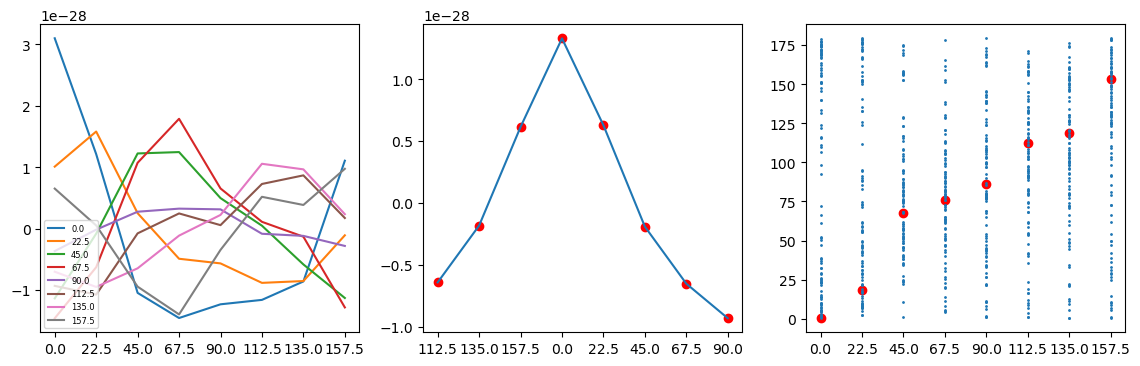

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(x_labels, m)
ax[0].set_xticks(x_labels)
ax[0].set_xticklabels(x_labels.astype(str))
ax[0].legend(x_labels, loc=3, prop={'size': 6})


ax[1].plot(x_labels, Xhat_shiftedmean)
ax[1].fill_between(x_labels, Xhat_shiftedmean-Xhat_shiftedsem, Xhat_shiftedmean+Xhat_shiftedsem)
ax[1].scatter(x_labels, Xhat_shiftedmean, color = 'red')
ax[1].set_xticks(x_labels)
ax[1].set_xticklabels(x_centeredlabels.astype(str))


ax[2].scatter(x_labels, mtheta, color = 'red')
ax[2].scatter(phi, theta, s = 1)
ax[2].set_xticks(x_labels)
ax[2].set_xticklabels(x_labels.astype(str))


# Part 2

In [ ]:
part2 = True

if not part2: 
    print(br)


__Temporal dimension decoding__

In [ ]:
G = binned_phi.copy() # binning/discritizing orientation dimension to assign a balanced number of stimuli to different dat
print(G)
CONDS = np.unique(G)
nConds = CONDS.size
nfold = 4
FoldsIdx = dt.CreateFolds(G, Y, nfold)

[8 1 7 8 1 5 2 1 2 4 4 4 4 6 7 1 3 4 6 2 8 3 6 2 1 8 5 6 1 4 4 7 6 3 7 7 7
 1 6 5 5 2 8 5 4 8 5 1 7 2 2 5 3 5 5 6 1 4 6 7 6 4 5 3 8 3 8 3 3 7 7 3 2 7
 1 3 2 8 2 1 7 8 1 8 8 6 2 3 6 5 5 2 4 3 7 6 2 5 8 5 8 1 6 2 5 3 6 1 7 3 1
 1 1 8 7 6 6 3 4 6 3 3 1 6 3 4 2 4 2 7 5 5 1 4 3 3 7 4 3 8 8 1 6 5 7 2 5 8
 7 8 1 1 8 4 3 8 6 3 4 8 3 2 6 1 2 6 2 8 7 8 4 7 4 4 4 2 1 5 5 6 2 5 7 5 5
 2 7 7 1 5 1 5 8 8 4 7 6 6 4 3 2 2 4 6 7 5 5 2 2 3 6 4 1 3 5 5 7 7 6 7 8 4
 8 4 1 2 6 1 5 1 1 2 3 8 4 3 8 4 2 6 3 3 7 7 2 1 3 6 4 2 7 5 4 4 3 3 6 8 5
 3 8 7 6 2 1 6 2 4 7 7 8 5 5 7 5 1 6 8 1 8 2 6 8 3 7 6 3 2 4 1 7 7 7 1 8 1
 6 4 5 6 7 6 7 8 6 8 8 2 6 4 5 3 2 5 6 7 4 8 1 4 2 6 7 4 8 7 8 5 4 1 1 3 3
 5 5 1 5 1 7 6 3 3 5 6 1 3 3 2 3 2 7 8 3 2 2 5 1 7 8 4 5 8 3 2 8 4 5 6 4 4
 4 1 2 1 5 2 1 5 3 1 3 8 5 5 2 8 1 4 4 1 5 1 7 8 5 4 2 6 6 6 3 4 8 2 3 5 6
 4 4 3 6 3 7 1 3 7 8 6 6 4 5 2 2 2 8 3 3 4 3 7 2 2 4 2 2 7 3 6 7 8 1 6 5 6
 7 7 3 5 6 7 8 1 5 1 4 1 6 7 4 8 1 2 8 8 1 7 7 4 5 2 8 5 6 3 2 7 3 3 6 4 1
 8 1 7 2 4 8 2 8 5 3 1 6 

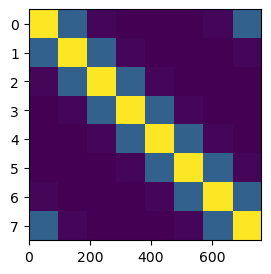

In [ ]:
numC = 8 # how many channels to use

# print(phi)
cfg = dict()
cfg['kappa'] = 4
cfg['NumC'] = numC
cfg['Tuning'] = 'vonmises'#'halfRectCos'
cfg['offset'] = 0

design, sortedesign = dt.stim_features(phi, cfg)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(sortedesign,aspect='auto',interpolation = 'none')

In [ ]:
numT = Y.shape[1]
Xhat = np.zeros([numC,numN, numT])
# for it in range(numT):
for it in range(120, 200):
    print(it)
    cfg = dict()
    cfg['cfgE'] = {'gamma': 0.01, 'demean' : True, 'returnPattern' : True}
    cfg['cfgD'] = {'demean' : 'traindata'}
    Xhat[:,:,it] = dt.CV_encoder(design, Y, it, cfg, FoldsIdx)
    

120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [ ]:
m = np.zeros((numC,numC, numT))
for ic in range(numC):
   m[:,ic] =  np.mean( Xhat[:, G == (ic+1),:], axis = 1)

Re-alligning predictions for trials with identical orientation

In [ ]:
Xhat_centered = 0*Xhat.copy()
m_centered = np.zeros((numC,numC, numT))
for ic in range(numC): # here trials that match similar label orientation are shifted together x positions (np.roll)
    Xhat_centered[:, G == (ic+1),:] = np.roll(Xhat[:,G == (ic+1),:], -ic, axis = 0)
    m_centered[:,ic, : ] =  np.mean( Xhat_centered[:,  G == (ic+1), :], axis = 1)

In [ ]:
print(m_centered.shape)

(8, 8, 211)


In [ ]:
x_labels = np.array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5])
Xhat_centeredmean = np.mean(Xhat_centered, axis = 1)
Xhat_centeredsem = np.std(m_centered, axis = 1)/Xhat.shape[1]
Xhat_shiftedmean = np.roll(Xhat_centeredmean, 3, axis = 0)
Xhat_shiftedsem = np.roll(Xhat_centeredsem, 3, axis = 0)
x_centeredlabels = np.roll(x_labels,  3, axis = 0)

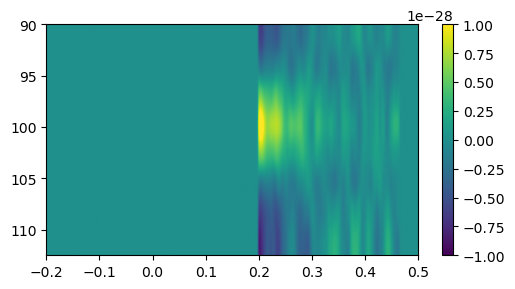

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.imshow(Xhat_shiftedmean,aspect='auto',vmin = -1e-28, vmax = 1e-28, interpolation = 'gaussian',extent=[time[0],time[-1],x_centeredlabels[0], x_centeredlabels[-1]])
plt.colorbar()
#ax.set_xtickslabels(time)
#ax.set_Yticklabels(x_centeredlabels.astype(str))


__Crossmodal temporal generalization decoding__

In [ ]:
import time as tic


In [ ]:
start = tic.time()
numT = Y.shape[1]
Xhat = np.zeros([numC,numN, numT, numT])
print('numT', numT)
#for it in range(numT):
for it in range(numT):

    cfg = dict()
    cfg['cfgE'] = {'gamma': 0.01, 'demean' : True, 'returnPattern' : True}
    cfg['cfgD'] = {'demean' : 'traindata'}
    Xhat[:,:,it, :] = dt.CV_TG_encoder(design, Y, it, cfg, FoldsIdx)
end = tic.time()

numT 211


In [ ]:
(end-start)/60

3.471761949857076

In [ ]:
m = np.zeros((numC,numC, numT, numT))
for ic in range(numC):
   m[:,ic, :, :] =  np.mean( Xhat[:, G == (ic+1),:,:], axis = 1)

print(m.shape)

(8, 8, 211, 211)


In [ ]:
mean = np.zeros((numC,numC))

for i in range (numT):
    mean = mean + m[:,:,i,i]

mean = mean / numT
mean.shape

(8, 8)

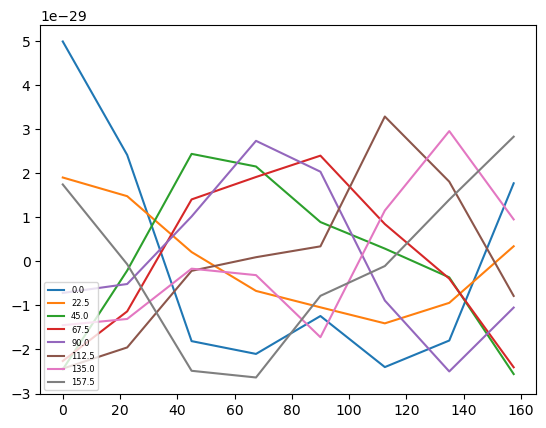

In [ ]:
plt.plot(x_labels, mean)
plt.legend(x_labels, loc=3, prop={'size': 6})

Re-alligning predictions for trials with identical orientation

In [ ]:
Xhat_centered = 0*Xhat.copy()
m_centered = np.zeros((numC,numC, numT, numT))
for ic in range(numC): # here trials that match similar label orientation are shifted together x positions (np.roll)
    Xhat_centered[:, G == (ic+1),:, :] = np.roll(Xhat[:,G == (ic+1),:, :], -ic, axis = 0)
    m_centered[:,ic, : , : ] =  np.mean( Xhat_centered[:,  G == (ic+1), :, :], axis = 1)


KeyboardInterrupt: 

Plotting diagonal values

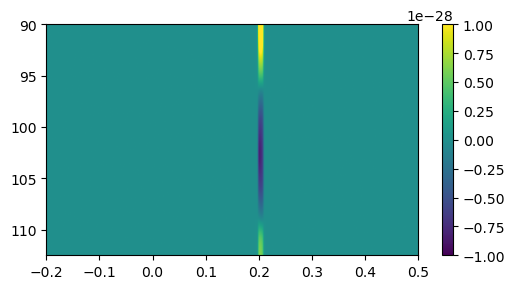

In [ ]:
diagonal_vals =  m_centered[:,:,range(numT),range(numT)]
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.imshow(np.mean(diagonal_vals, axis = 1),aspect='auto',vmin = -1e-28, vmax = 1e-28, interpolation = 'gaussian',extent=[time[0],time[-1],x_centeredlabels[0], x_centeredlabels[-1]])
plt.colorbar()


Correlation between actual and predicted orientation values

In [ ]:
r = np.zeros((numT, numT))

for it1 in range(numT):
    for it2 in range(numT):
        # Kernel to back project channel outputs to orientation space
        kernel = np.exp(1j * (np.linspace(0, numC-1,numC)*(2*np.pi/numC)))
        Z = kernel @ Xhat[:,:, it1, it2]

        theta = np.mod(np.angle(Z), 2*np.pi) * (180/np.pi) / 2    # Decoded orientation (retain the module of the complex number)

        rs = np.mean(np.exp(1j * (theta - phi) * (np.pi/180)*2)) # correlation between decoded and presented orientation
        r[it1, it2] = np.abs(rs) * np.cos(np.angle(rs))
        r

In [ ]:
time_labels = [0, 0.2, 0.4, 0.6]

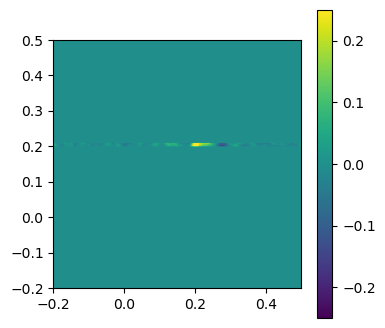

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.imshow(r, aspect= 1, interpolation = None, vmin = -0.25, vmax = 0.25, origin = 'lower',extent=[time[0],time[-1],time[0],time[-1]])
plt.colorbar()
#ax.set_xticklabels(time_labels)
#ax.set_yticklabels(time_labels)

In [ ]:
def CV_encoder(design, Y, sel_t, cfg, FoldsIdx):

    numC = design.shape[0]
    numN = Y.shape[2]

    Xhat = np.zeros([numC,numN])
    Xhat_centered = 0*Xhat.copy()

    nfold = np.size(FoldsIdx)

    for ifold in range(nfold):
        # Output matrix
        dat = dict()
        dat['Y_train'] = np.squeeze(Y[:,sel_t, FoldsIdx[ifold]['train_index']])
        idesign = design[:,FoldsIdx[ifold]['train_index']]
        dat['Y_test'] = np.squeeze(Y[:,sel_t, FoldsIdx[ifold]['test_index']])

        if 'cfgE' not in cfg:
            cfgE = {'gamma': 0.01, 'demean' : True, 'returnPattern' : True}
        else:
            cfgE = cfg['cfgE']

        decoder = dt.train_encoder(idesign, dat['Y_train'], cfgE)

        if 'cfgD' not in cfg:
            cfgD = {'demean' : 'traindata'}
        else:
            cfgD = cfg['cfgD']


        Xhat[:,FoldsIdx[ifold]['test_index']] = dt.test_encoder( decoder, dat['Y_test'], cfgD) 
    
    return Xhat

Getting mean orientation values for each stimulus bin

# Plotting results

In [ ]:
# Creating dat containing test and train indexes
nfold = 2

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=nfold,shuffle=False)
CrossValIdx = [None] * nfold
i = 0
for train_index, test_index  in  skf.split(X = np.zeros(numN), y = X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    CrossValIdx[i] = { 'train_index': train_index, 'test_index': test_index}
    i += 1

X_train = G[ CrossValIdx[0]['train_index']][:,np.newaxis]
Y_train = np.squeeze(Y[:,sel_t, CrossValIdx[0]['train_index']]).shape
phi_train = phi[ CrossValIdx[0]['train_index']][:,np.newaxis]
X_test = G[ CrossValIdx[0]['test_index']][:,np.newaxis]
Y_test = np.squeeze(Y[:,sel_t, CrossValIdx[0]['test_index']]).shape
phi_test = phi[ CrossValIdx[0]['test_index']][:,np.newaxis]

In [ ]:

X_train = G[ CrossValIdx[0]['train_index']][:,np.newaxis]
Y_train = np.squeeze(Y[:,sel_t, CrossValIdx[0]['train_index']]).shape
phi_train = phi[ CrossValIdx[0]['train_index']][:,np.newaxis]
X_test = G[ CrossValIdx[0]['test_index']][:,np.newaxis]
Y_test = np.squeeze(Y[:,sel_t, CrossValIdx[0]['test_index']]).shape
phi_test = phi[ CrossValIdx[0]['test_index']][:,np.newaxis]

In [ ]:
# G[dat[0].astype(int)]

In [ ]:
dat = [np.array([])]*nfold

for iCond in range(nConds):
    # Find indexes
    indx = np.where(G == CONDS[iCond])[0]
    n_indx = indx.size 
    # Shuffle indexes
    indx = np.random.permutation(indx)
    # Distribute across dat
    nelemxfold = np.floor(indx.size/nfold)
    groupNumber = np.repeat(np.arange(0,nfold), nelemxfold)

    for iFold in range(nfold):
        dat[iFold] = np.append(dat[iFold], indx[np.where(groupNumber == iFold)])

 

In [ ]:
indx[np.where(groupNumber == iFold)]

array([746, 584, 416, 169, 495, 358, 462, 303, 393, 696, 611, 663, 402,
       424, 277, 677, 294, 494, 439, 589,  98, 270, 541, 459, 317, 553,
       305, 306, 519, 568, 167, 192,  84, 592, 324, 488, 159, 719, 654,
        81, 233, 364, 149, 627,  66,  45, 520])